In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

#from SoilTools import Hutton as HU
#from SoilTools import Hollis as HO

from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (15.,15)

In [9]:
SOIL_DIR='/prj/GREENHOUSE/SOIL_PROPERTIES/datasets/'
EnW_file=SOIL_DIR+'England_Wales_Soil_Data/LDE16_12_SRUC_Tarsitano/' + \
            'EnW_Soil_WeightedComposition_CHESSgrid_ECOSSElayers_AR.nc'

Scot_file=SOIL_DIR+'Scotland_Soil_Data/' + \
            'Scot_Soil_WeightedComposition_CHESSgrid_ECOSSElayers_CULT.nc'

COMP_outfile=SOIL_DIR+'Merged_Soil_WeightedComposition_CHESSgrid_CultAR.nc'
BC_outfile=SOIL_DIR+'Merged_Soil_WeightedBCproperties_CHESSgrid.nc'
VG_outfile=SOIL_DIR+'Merged_Soil_WeightedVGproperties_CHESSgrid.nc'

CHESS_landcover_file='/users/eow/edwcom/CHESS/chess_landcover_2000.nc'

fill_value=-9999.
Soil_Layer_Thick=np.array([0.1,0.25,0.65,2.0])   #(metres)
Soil_Layer_Depth=np.array([0.1,0.23,1.0,3.0]) #(metres)
nSD=len(Soil_Layer_Thick)

In [10]:
# Merge Data:
#EnW_varnames=['sand','silt','clay','ph','org_carb']
#Scot_varnames=['sand','silt','clay','ph','carbon']
Merged_COMPnames=['sand','silt','clay','org_carb','ph','Bulk_Density']
Merged_BCnames=['BC_sm_sat','BC_hcon','BC_hcap','BC_sm_wilt',\
                'BC_bexp','BC_sathh','BC_satcon','BC_sm_crit']
Merged_VGnames=['VG_oneovernminusone','VG_ksat','VG_hcap','VG_sm_wilt',\
                'VG_oneoveralpha','VG_sm_crit','VG_hcon','VG_sm_sat'   ]

In [11]:
EnW_datadict={}
EnWinf=nc.Dataset(EnW_file,'r')
for var in EnWinf.variables:
    EnW_datadict[var]=EnWinf.variables[var][:]
EnWinf.close()


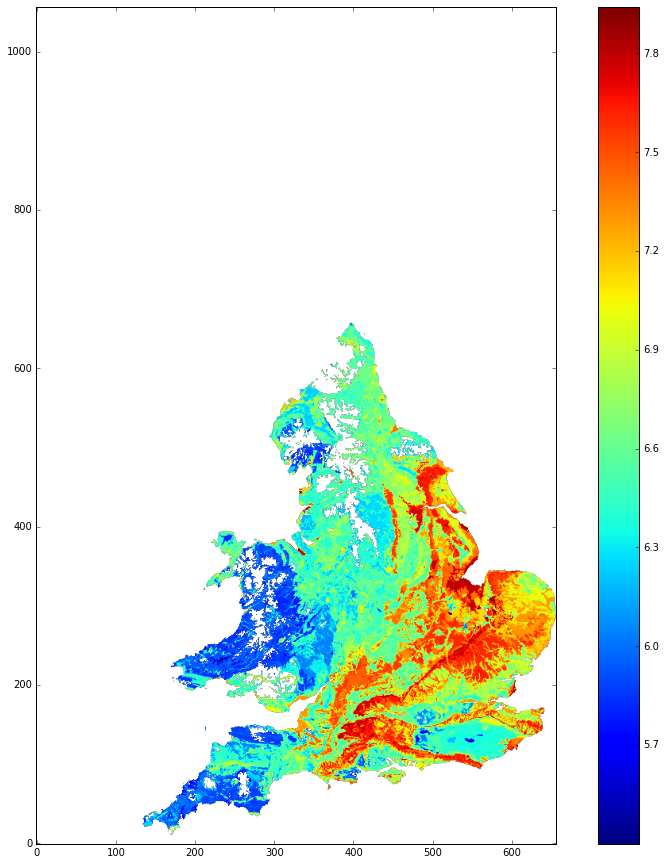

In [12]:
plotdata=EnW_datadict['clay'][0,:]+EnW_datadict['sand'][0,:]+EnW_datadict['silt'][0,:]
plotdata=EnW_datadict['ph'][0,:]
plt.imshow(plotdata,origin='bottom')
plt.colorbar()

In [13]:
Scot_datadict={}
Scotinf=nc.Dataset(Scot_file,'r')
for var in Scotinf.variables:
    Scot_datadict[var]=Scotinf.variables[var][:]
Scotinf.close()

#Scot_datadict['carbon_dens']=Scot_datadict['org_matter']/1.724

In [14]:
#for var in Scot_datadict:
#    print(var)

# PTF from the ECOSSE paper:
Scot_datadict['Bulk_Density']=1.772 - (0.4127*np.log(Scot_datadict['org_carb']))
#plt.imshow(Scot_datadict['Bulk_Density'][0,:],origin='bottom')
#plt.colorbar()
#Scot_datadict['Bulk_Density'] = HU.bulk_density( Scot_datadict['org_carb'], \
#                                                 Scot_datadict['clay'],     \
#                                                 Scot_datadict['silt']      )


/users/eow/edwcom/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log


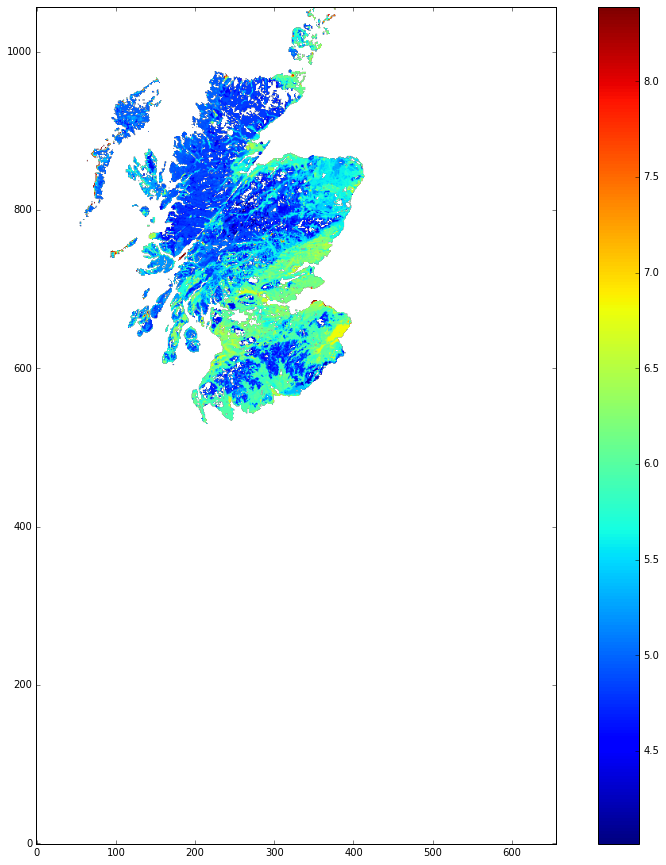

In [16]:
#plotdata=EnW_datadict['Bulk_Density']
#for iSD in range(nSD):
#    plt.subplot(2,2,iSD+1)
#    plt.imshow(plotdata[iSD,:],origin='bottom')
#    plt.colorbar()
#    
#plt.show()
plt.imshow(Scot_datadict['ph'][10,:],origin='bottom')
plt.colorbar()

In [17]:
#read in latlon/xy data from chess_landcover
LLinf=nc.Dataset(CHESS_landcover_file,'r')
lats=LLinf.variables['lat'][:]
lons=LLinf.variables['lon'][:]
landcover=LLinf.variables['frac'][:]
x=LLinf.variables['x'][:]
y=LLinf.variables['y'][:]
LLinf.close()
LAND_MASK=landcover.mask[0,:]

In [18]:
def MERGE_DATA(data1,data2,fill_value=fill_value):
    MERGED_DATA=np.zeros_like(data1.data)+fill_value
    
    # Do each layer independently
    for iSD in range(nSD):
        data1_lay=data1[iSD,:]
        data2_lay=data2[iSD,:]
        data1_Mask=(data1_lay.mask==False)&(data2_lay.mask==True)
        data2_Mask=(data1_lay.mask==True)&(data2_lay.mask==False)
        BOTH_Mask=(data1_lay.mask==False)&(data2_lay.mask==False)
        
        # ratio of overlapping grid cells
        ratio=np.mean(data1_lay[BOTH_Mask])/np.mean(data2_lay[BOTH_Mask])
        #print(iSD, ratio)
        MERGED_DATA[iSD,data1_Mask]=data1_lay[data1_Mask].data
        MERGED_DATA[iSD,data2_Mask]=data2_lay[data2_Mask].data*ratio

        MERGED_DATA[iSD,BOTH_Mask]= ( (data1_lay[BOTH_Mask].data ) + \
                                       data2_lay[BOTH_Mask].data*ratio ) \
                                          / 2.

    return np.ma.masked_equal(MERGED_DATA,fill_value)
    

In [19]:
# Merge datasets, using the overlap region to scale the Scotland data to the EnW data
#BC_datadict={}
#for param in Merged_BCnames:
#    #print(param)
#    BC_datadict[param]=MERGE_DATA( EnW_datadict[param], \
#                                   Scot_datadict[param] ).copy()


In [20]:
#data1=EnW_datadict['BC_hcon'][0,:]
#data2=Scot_datadict['BC_hcon'][0,:]
#BOTH_Mask=(data1.mask==False)&(data2.mask==False)
        

In [21]:
##param='BC_satcon'
#vmin,vmax=0,30
#SF=1e3
#fig,axes=plt.subplots(ncols=3,nrows=1, figsize=(20,8))#

#im0=axes[0].imshow(EnW_datadict[param][0,:]*SF,origin='bottom',vmin=vmin,vmax=vmax)
#plt.colorbar(im0,ax=axes[0])
#im1=axes[1].imshow(Scot_datadict[param][0,:]*SF,origin='bottom',vmin=vmin,vmax=vmax)
#plt.colorbar(im1,ax=axes[1])
#im2=axes[2].imshow(BC_datadict[param][0,:]*SF,origin='bottom',vmin=vmin,vmax=vmax)
#plt.colorbar(im2,ax=axes[2])

In [22]:
#plotdata=np.ma.masked_array(Scot_datadict['BC_hcap'][0,:],mask=BOTH_Mask==False)
#plt.imshow(plotdata[500:700,300:500],origin='bottom')
#plt.colorbar()


In [23]:
# Merge datasets, using the overlap region to scale the Scotland data to the EnW data
COMP_datadict={}
for param in Merged_COMPnames:  
    #print(param)
    COMP_datadict[param]=MERGE_DATA( EnW_datadict[param], \
                                     Scot_datadict[param] ).copy()
# Merge datasets, using the overlap region to scale the Scotland data to the EnW data
BC_datadict={}
for param in Merged_BCnames:
    #print(param)
    BC_datadict[param]=MERGE_DATA( EnW_datadict[param], \
                                   Scot_datadict[param] ).copy()

VG_datadict={}
for param in Merged_VGnames:
    VG_datadict[param]=MERGE_DATA( EnW_datadict[param], \
                                   Scot_datadict[param] ).copy()
    

KeyError: 'BC_sm_sat'

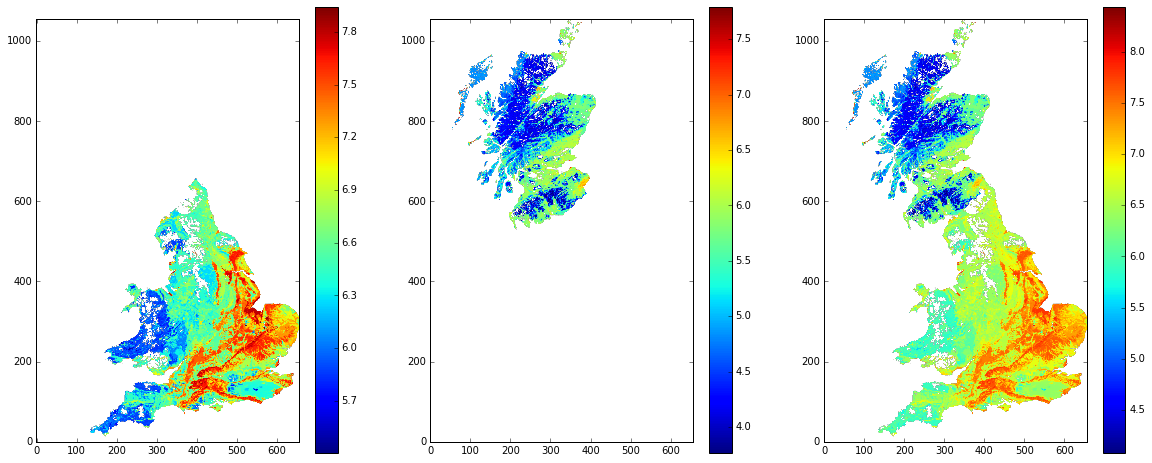

In [24]:
param='ph'
vmin,vmax=None,None
SF=1
fig,axes=plt.subplots(ncols=3,nrows=1, figsize=(20,8))

im0=axes[0].imshow(EnW_datadict[param][0,:]*SF,origin='bottom',vmin=vmin,vmax=vmax)
plt.colorbar(im0,ax=axes[0])
im1=axes[1].imshow(Scot_datadict[param][0,:]*SF,origin='bottom',vmin=vmin,vmax=vmax)
plt.colorbar(im1,ax=axes[1])
im2=axes[2].imshow(COMP_datadict[param][0,:]*SF,origin='bottom',vmin=vmin,vmax=vmax)
plt.colorbar(im2,ax=axes[2])

In [ ]:
print(len(Merged_VGnames))

In [25]:
# Fill missing values laterally:

def FILL_GAPS_LATERALLY(data_dict):
    for var in data_dict:
        # loop over soil depths
        for iSD in range(nSD):
            # Index of bad land points
            badex=np.where((data_dict[var].mask[iSD,:]==True)&(LAND_MASK==False))
            # Index of good land points
            goodex=np.where((data_dict[var].mask[iSD,:]==False)&(LAND_MASK==False))
            # convert good index into floats
            goodex = [ good.astype(float) for good in goodex ]
            # calculate the closest good point to each bad point
            closest=[]
            for iBAD in zip(badex[0],badex[1]):
                tempclosest=np.argmin(  np.abs(goodex[0]-iBAD[0]) \
                                      + np.abs(goodex[1]-iBAD[1]) ) 
                closest.append(int(tempclosest))
            #convert good index back to integers
            goodex = [ good.astype(int) for good in goodex ]
            # replace bad values with closest good value and change mask
            data_dict[var].data[iSD,badex[0],badex[1]] = \
                data_dict[var].data[iSD,goodex[0][closest],goodex[1][closest]]
            data_dict[var].mask[iSD,badex[0],badex[1]] = False
    return data_dict

In [26]:
COMP_datadict=FILL_GAPS_LATERALLY(COMP_datadict)

In [ ]:
#plt.figure(figsize=(20,15))
#plt.subplot(1,2,1)
#plt.imshow(COMP_datadict['sand'][0,:],origin='bottom')
#plt.colorbar()
#plt.subplot(1,2,2)
#plt.imshow(COMP_datadict_filled['sand'][0,:],origin='bottom')
#plt.colorbar()

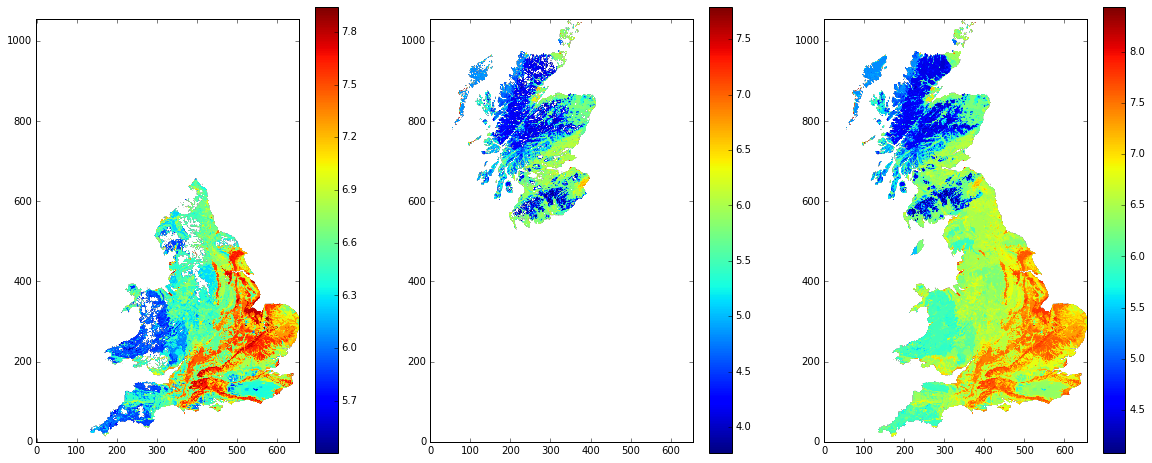

In [27]:
param='ph'
vmin,vmax=None,None
SF=1
fig,axes=plt.subplots(ncols=3,nrows=1, figsize=(20,8))

im0=axes[0].imshow(EnW_datadict[param][0,:]*SF,origin='bottom',vmin=vmin,vmax=vmax)
plt.colorbar(im0,ax=axes[0])
im1=axes[1].imshow(Scot_datadict[param][0,:]*SF,origin='bottom',vmin=vmin,vmax=vmax)
plt.colorbar(im1,ax=axes[1])
im2=axes[2].imshow(COMP_datadict[param][0,:]*SF,origin='bottom',vmin=vmin,vmax=vmax)
plt.colorbar(im2,ax=axes[2])

In [ ]:
VG_datadict=FILL_GAPS_LATERALLY(VG_datadict)

In [ ]:
BC_datadict=FILL_GAPS_LATERALLY(BC_datadict)

In [ ]:
# Renormalise  sand+silt+clay to 100% 
SSC_total=COMP_datadict['sand']+COMP_datadict['silt']+COMP_datadict['clay']

for var in ['sand','silt','clay']:
    COMP_datadict[var] = COMP_datadict[var]/(SSC_total*0.01)

In [ ]:
print(COMP_outfile)
#for var in Merged_varnames:
    #Merged_datadict[var].mask[Merged_datadict[var].data!=Merged_datadict[var].fill_value] = False

In [ ]:
# Output Composition data 
outf=nc.Dataset(COMP_outfile+'.temp','w')
templatef=nc.Dataset(EnW_file,'r')
# create dimensions
for dim in templatef.dimensions:
    outf.createDimension(str(dim),len(templatef.dimensions[dim]))
    outvar=outf.createVariable(str(dim),'float32',str(dim))
    for att in templatef.variables[dim].ncattrs():
        outvar.setncattr(str(att),templatef.variables[dim].getncattr(str(att)))
    outvar[:]=templatef.variables[dim][:]
    
    
for var in COMP_datadict:
    invar=templatef.variables[var]
    outvar=outf.createVariable(var,'float32',invar.dimensions)
    for att in invar.ncattrs():
        outvar.setncattr(str(att),invar.getncattr(str(att)))
    outvar[:]=COMP_datadict[var]
    
outf.title='Merged Soil Composition map for the UK'
outf.data1='Cranfield England and Wales Soil Map'
outf.data2='Scotland Soils'
outf.method='Soil Composition aggregated on to the CHESS grid'
outf.MergedBy='Edward Comyn-Platt, edwcom@ceh.ac.uk'
outf.organisation='Centre of Ecology and Hydrology'

outf.close()
templatef.close()

In [ ]:
# Output BC Properties data 
outf=nc.Dataset(BC_outfile,'w')
templatef=nc.Dataset(Scot_file,'r')
# create dimensions
for dim in templatef.dimensions:
    outf.createDimension(str(dim),len(templatef.dimensions[dim]))
    outvar=outf.createVariable(str(dim),'float32',str(dim))
    for att in templatef.variables[dim].ncattrs():
        outvar.setncattr(str(att),templatef.variables[dim].getncattr(str(att)))
    outvar[:]=templatef.variables[dim][:]
    
    
for var in BC_datadict:
    invar=templatef.variables[var]
    outvar=outf.createVariable(var,'float32',invar.dimensions)
    outvar[:]=BC_datadict[var]
    
outf.title='Merged Brooks and Corey Soil Properties map for the UK'
outf.data1='Cranfield England and Wales Soil Map'
outf.data2='Scotland Soils'
outf.method='Soil Properties calcualted at the soil type level, then aggregated on to the CHESS grid'
outf.MergedBy='Edward Comyn-Platt, edwcom@ceh.ac.uk'
outf.organisation='Centre of Ecology and Hydrology'

outf.close()
templatef.close()

In [ ]:
# Output VG Properties data 
outf=nc.Dataset(VG_outfile,'w')
templatef=nc.Dataset(Scot_file,'r')
# create dimensions
for dim in templatef.dimensions:
    outf.createDimension(str(dim),len(templatef.dimensions[dim]))
    outvar=outf.createVariable(str(dim),'float32',str(dim))
    for att in templatef.variables[dim].ncattrs():
        outvar.setncattr(str(att),templatef.variables[dim].getncattr(str(att)))
    outvar[:]=templatef.variables[dim][:]
    
    
for var in VG_datadict:
    invar=templatef.variables[var]
    outvar=outf.createVariable(var,'float32',invar.dimensions)
    outvar[:]=VG_datadict[var]
    
outf.title='Merged Van Genuchten Soil Properties map for the UK'
outf.data1='Cranfield England and Wales Soil Map'
outf.data2='Scotland Soils'
outf.method='Soil Properties calcualted at the soil type level, then aggregated on to the CHESS grid'
outf.MergedBy='Edward Comyn-Platt, edwcom@ceh.ac.uk'
outf.organisation='Centre of Ecology and Hydrology'

outf.close()
templatef.close()

In [ ]:
#outf.close()